In [1]:
import numpy as np
import pandas as pd
import nltk

Places = pd.read_csv('final_1.csv')
Places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13751 entries, 0 to 13750
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Place               13751 non-null  object 
 1   City                13751 non-null  object 
 2   Review              13751 non-null  object 
 3   Rating              13751 non-null  float64
 4   Matched_Keywords    13751 non-null  object 
 5   Review_Count        13751 non-null  int64  
 6   Best_time_to_visit  13751 non-null  object 
 7   popularity          13751 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 859.6+ KB


In [2]:
Places.head()

,Place,City,Review,Rating,Matched_Keywords,Review_Count,Best_time_to_visit,popularity
0,1 MG Lido Mall,Bengaluru,decorative elegant think kulfi cuisines friend...,4.26,Sports Gurudwara Food Tea Commercial Lake Chur...,107,OctoberMarch,0.852000
1,10 Acres Mall,Ahmedabad,cinema closed wash theatre reliance extra skip...,3.20,Commercial Entertainment Building Mall Shopping,5,July-March,0.361667
2,1008 Lingam Temple,Salem,peryakovil suitable security mission vinayaga ...,4.30,Hill Food Religious Ground Temple Mountain Cen...,90,September-March,0.860000
3,101 Ft. Hanuman Idol,Chhindwara,p pradesh near come tall lord surroundings lar...,4.50,Park,4,October-March,0.483333
4,108 Feet Height Statue Of Basaveshwara,Bidar,memorable camera marauders authority mantap as...,4.00,Religious Temple Monument Fort Development,10,JulyOctober,0.483333


In [3]:
select_columns = Places[['Place','Matched_Keywords','Best_time_to_visit','popularity','Review','City']]

new_columns = {'Place':'place','Matched_Keywords':'type','City':'city','Best_time_to_visit':'timeofyear','popularity':'popularity','Review':'review'}

places = select_columns.rename(columns = new_columns)

places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13751 entries, 0 to 13750
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   place       13751 non-null  object 
 1   type        13751 non-null  object 
 2   timeofyear  13751 non-null  object 
 3   popularity  13751 non-null  float64
 4   review      13751 non-null  object 
 5   city        13751 non-null  object 
dtypes: float64(1), object(5)
memory usage: 644.7+ KB


In [4]:
places = places.dropna(subset=['type'])
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13751 entries, 0 to 13750
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   place       13751 non-null  object 
 1   type        13751 non-null  object 
 2   timeofyear  13751 non-null  object 
 3   popularity  13751 non-null  float64
 4   review      13751 non-null  object 
 5   city        13751 non-null  object 
dtypes: float64(1), object(5)
memory usage: 644.7+ KB


In [5]:
import nltk

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [6]:
places['type'] = places['type'].apply(lambda x:x.split())
places['city'] = places['city'].apply(lambda x:x.split())
places['timeofyear'] = places['timeofyear'].apply(lambda x:x.split('-'))
places['review'] = places['review'].apply(lambda x:x.split())

places['tags'] = places['type'] + places['city'] + places['timeofyear'] + places['review']

places_cp = places[['place','tags']]

places_cp['tags'] = places_cp['tags'].apply(lambda x:" ".join(x))
places_cp['tags'] = places_cp['tags'].apply(lambda x:x.lower())
places_cp['tags'] = places_cp['tags'].apply(stem)

places_cp['tags']

C:\Users\SARVESH GANGU\AppData\Local\Temp\ipykernel_14668\2130397775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places_cp['tags'] = places_cp['tags'].apply(lambda x:" ".join(x))
C:\Users\SARVESH GANGU\AppData\Local\Temp\ipykernel_14668\2130397775.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places_cp['tags'] = places_cp['tags'].apply(lambda x:x.lower())
C:\Users\SARVESH GANGU\AppData\Local\Temp\ipykernel_14668\2130397775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

0        sport gurudwara food tea commerci lake church ...
1        commerci entertain build mall shop ahmedabad j...
2        hill food religi ground templ mountain center ...
3        park chhindwara octob march p pradesh near com...
4        religi templ monument fort develop bidar julyo...
                               ...                        
13746    natur adventur villag natur trek mountain then...
13747    center balasor awesom destin transport watch c...
13748    gurudwara food swim ghat religi commerci natur...
13749    palac commerci food resort cultur osian march ...
13750    templ udupi septemb june templ goddess purohit...
Name: tags, Length: 13751, dtype: object

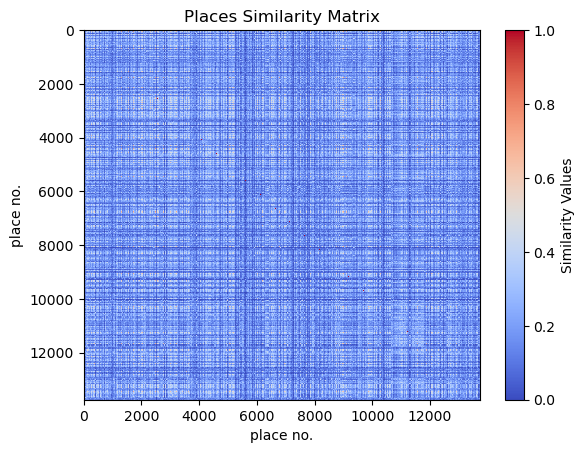

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(places_cp['tags']).toarray()

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)


plt.imshow(similarity, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Similarity Values')
plt.title('Places Similarity Matrix')
plt.xlabel('place no.')
plt.ylabel('place no.')
plt.show()

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial import distance
import pandas as pd
import nltk

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

def recommend(desc):
    
    
    txt = desc.lower()
    txt = stem(txt)
    txt_vector = cv.transform([txt]).toarray()
    
    similarity_array = cosine_similarity(txt_vector,vectors)
    
    rec_places = pd.DataFrame(places['place'],columns=['place'])
    rec_places['similarity'] = similarity_array[0]
    rec_places['popularity'] = places['popularity']
    rec_places['recommend_rating'] = rec_places['similarity']*(1+(rec_places['popularity']/2))
    
    return(rec_places.nlargest(5, 'recommend_rating')['place'].tolist())

print(recommend("Mosque"))

['Qutbuddin Mosque', 'Gedumian Mosque', 'Pallickal Mosque', 'Masjid-e-Belal', 'Noor Masjid']


In [9]:
print(recommend("beautiful Beach point with sun SET"))

['Galjibag Beach', 'Talapady Beach', 'Thumba Beach', 'Perupalem Beach', 'Point Calimere Wildlife and Bird Sanctuary']


In [10]:
print(recommend("pleasant hilly area near delhi"))

['Monument to Leo Tolstoy', 'The Sun Dial', 'Ambadevi Mandir', 'Kamla Nehru Ridge', 'Shitala Mata Mandir']


In [11]:
import numpy as np
import pandas as pd
import nltk

df = pd.read_csv('final.csv')
pd.set_option('display.max_colwidth', None)
result = df[df['Place'] == 'Kushaleshwar Temple']
result

,Place,City,Review,Rating,Matched_Keywords,Review_Count,Best_time_to_visit,popularity
6438,Kushaleshwar Temple,Keonjhar,anandapur beautiful wide refreshing kushaleshwar worship great keonjhar like near area park temple mind,5.0,Park Temple Area,1,OctoberMarch,0.508333


In [12]:
print(recommend("best cold snowy place"))

['Honnekatte Temple', 'Baisipali Wildlife Sanctuary', 'Hazarat Nizam Shah Nandodi Sarkaar', 'Vedalife', 'Chango Temple']


In [ ]:
print(pd.__version__)

In [ ]:
import pickle

In [ ]:
pickle.dump(vectors, open('vector.pkl', 'wb'))

In [ ]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [ ]:
pickle.dump(places, open('places.pkl', 'wb'))